In [12]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
from sklearn import linear_model
from numpy import arange
from sklearn.linear_model import LassoCV

In [2]:
dataframe = read_csv('frst26.csv', header = None,nrows= 100)
print(dataframe.shape)
dataframe.head()

(100, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,37.550697,54.162910,78.000646,78.315777,99.518017,51.340211,96.020152,1.469290,35.932348,34.065767,...,0,0,0,0,0,0,0,0,0,0.527727
1,36.715044,36.865510,22.948168,40.278610,19.516831,56.398177,66.841060,14.881940,55.227367,86.604332,...,0,0,0,0,0,0,0,0,0,1.231863
2,27.731757,25.197732,7.256232,44.758872,87.213735,85.460310,94.855006,54.048071,3.064264,73.026991,...,0,0,0,0,0,0,0,0,0,0.025010
3,74.328620,31.351556,5.640941,56.879810,70.385267,20.778855,71.294869,44.557759,14.972031,77.350946,...,0,0,0,0,0,0,0,0,0,0.109302
4,64.893160,19.446318,28.512706,6.727051,64.921419,96.057769,51.084607,11.904422,25.806985,79.019423,...,0,0,0,0,0,0,0,0,0,0.273861


In [3]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

In [4]:
eps = 5e-5 
alphas_lasso, coefs_lasso, _= linear_model.lasso_path(X, y, eps, fit_intercept=False)

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass eps=5e-05 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [5]:
df = read_csv('frst26.csv',header = None)
data2 = dataframe.values
X_2, y_2 = data2[:, :-1], data2[:, -1]

In [14]:
cv3 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model3 = LassoCV(alphas=arange(0, 1, 0.01), cv=cv3, n_jobs=-1)
model3.fit(X, y)
scores = cross_val_score(model3, X, y, scoring='neg_mean_squared_error', cv=cv3, n_jobs=-1)
scores = absolute(scores)
print(mean(scores))

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.133151312220434, tolerance: 0.010204431155017879
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\heeru\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarn

0.0937672165474033


In [10]:
yhat3 = model3.predict(X_2)

print('alpha: %f' % model3.alpha_)

alpha: 0.990000


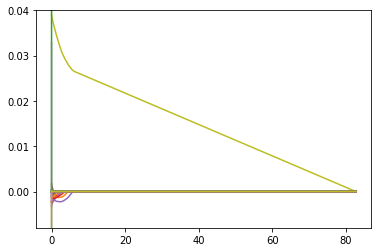

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(-0.008, 0.04)
m,n = X.shape
for i in range(n):
    plt.plot(alphas_lasso, coefs_lasso[i])
    #print(coefs_lasso[i])
    

In [27]:
scores = cross_val_score(model3,  X_2, yhat3, scoring='neg_mean_squared_error', cv=cv3, n_jobs=-1)
scores = absolute(scores)
print(mean(scores))

2.5994458566220274e-11


In [30]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(yhat3,y_2)
print(mse)

0.07972571068507979
